In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,auc,roc_curve,roc_auc_score,f1_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
def AUC_RUC_BN(y_test,y_pred):
    
    FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
    Auc_Curve = auc(x=FP, y=TP)
    plt.plot(FP, TP, label=f"ROC Curve (area={round(Auc_Curve, 2)}) ")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.10])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

In [4]:
def AUC_RUC_MC(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_Class = set(actual_class)
  roc_auc_DICT = {}

  for per_class in unique_Class:
    #creating a list of all the classes except the current class 
    other_Class = [x for x in unique_Class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_Class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_Class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_DICT[per_class] = roc_auc.tolist()
    print("Class:",per_class)

    FP,TP,threshold = roc_curve(y_true=new_actual_class, y_score=new_pred_class)
    auc_curve = auc(x=FP, y=TP)
    plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.10])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()
  return roc_auc_DICT


MODEL1

In [3]:
data=pd.read_csv('Final_Project_dataset.csv',index_col=False)
data=data.drop(['UDI','Product ID'],axis=1)

Scaler=MinMaxScaler()
Encoder=LabelEncoder()

numerical_Columns=[ 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_Columns=[ 'Type', 'Failure Type']

for column in numerical_Columns:
    if  abs(data[column].skew()) > 0.5:
        data[column] = np.log(data[column])
    if column in numerical_Columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5* IQR
        upper_bound = Q3 +1.5 * IQR
        data[column]=data[column].clip(lower_bound,upper_bound)
Scaler.fit(data[numerical_Columns])
data[numerical_Columns]=Scaler.fit_transform(data[numerical_Columns])  
Type=data['Type'].unique()
Failure_type=data['Failure Type'].unique()

data['Type']=data['Type'].map({'L':1.0,'M':2.0,'H':3.0})
data['Failure Type']=data['Failure Type'].map({'No Failure':0.0,'Power Failure':1.0,'Tool Wear Failure':2.0,'Overstrain Failure':3.0, 'Random Failures':4.0,'Heat Dissipation Failure':5.0})

dict_Type=dict(zip(Type,data['Type'].unique()))
dict_Fail_Type=dict(zip(Failure_type,data['Failure Type'].unique()))

# with open ('dict_Type.json','w') as File:
#     json.dump(dict_Type,File)

# with open ('dict_Fail_Type.json','w') as File:
#     json.dump(dict_Fail_Type,File)

X = data.drop(['Target', 'Failure Type'], axis=1)
y = data["Target"]

SM=SMOTE()
X_resampled,y_resampled=SM.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2)
LR_Model=LogisticRegression()
LR_Model.fit(X_train,y_train)
y_pred_best= LR_Model.predict(X_test)   
print("Accuracy of Logistic Regression:",accuracy_score(y_test,y_pred_best))
print("******************")
Random_Forest_model = RandomForestClassifier()
Random_Forest_model.fit(X_train, y_train)
y_pred_best= Random_Forest_model.predict(X_test)   
print("Accuracy of Random Forest Classifier:",accuracy_score(y_test,y_pred_best))
print("******************")
Gradient_Boosting_model = GradientBoostingClassifier()
Gradient_Boosting_model.fit(X_train, y_train)
y_pred_best= Gradient_Boosting_model.predict(X_test)   
print("Accuracy of Gradient Boosting Classifier:",accuracy_score(y_test,y_pred_best))
print("******************")
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
y_pred_best= SVC_model.predict(X_test)   
print("Accuracy of Support Vector Classifier:",accuracy_score(y_test,y_pred_best))
print("******************")


Accuracy of Logistic Regression: 0.7749029754204398
******************
Accuracy of Random Forest Classifier: 0.9795601552393273
******************
Accuracy of Gradient Boosting Classifier: 0.9435963777490297
******************
Accuracy of Support Vector Classifier: 0.9094437257438551
******************


In [4]:
print(data.head())

   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0   2.0             0.304348                 0.358025                0.547668   
1   1.0             0.315217                 0.370370                0.353756   
2   1.0             0.304348                 0.345679                0.477967   
3   1.0             0.315217                 0.358025                0.389038   
4   1.0             0.315217                 0.370370                0.353756   

   Torque [Nm]  Tool wear [min]  Target  Failure Type  
0     0.551471         0.000000       0           0.0  
1     0.615809         0.011858       0           0.0  
2     0.672794         0.019763       0           0.0  
3     0.490809         0.027668       0           0.0  
4     0.500000         0.035573       0           0.0  


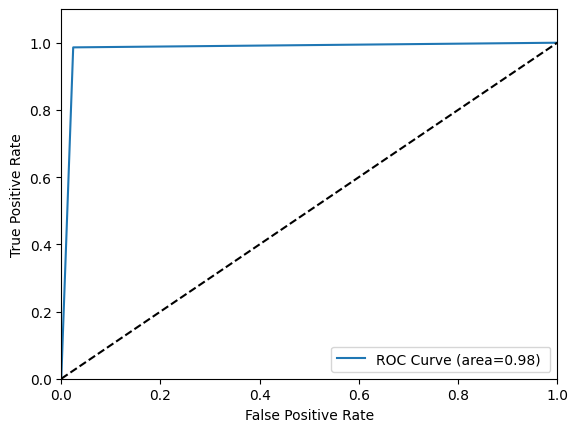

None
ROC_AUC_Score 0.9810637526397791
Accuracy: 0.9811125485122898
Precision: 0.9766497461928934
F1 Score 0.9813823004335629
Recall Score: 0.9861609431060995


In [7]:
Random_Forest_model = RandomForestClassifier()
Random_Forest_model.fit(X_train, y_train)
y_pred_best= Random_Forest_model.predict(X_test)   
print(AUC_RUC_BN(y_test,y_pred_best))
print('ROC_AUC_Score',roc_auc_score(y_test,y_pred_best))
print("Accuracy:",accuracy_score(y_test,y_pred_best))
print("Precision:",precision_score(y_test,y_pred_best))
print("F1 Score",f1_score(y_test,y_pred_best))
print("Recall Score:",recall_score(y_test,y_pred_best))

In [9]:
# param_grid = {
#     'n_estimators': [50,100, 200,400],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth' : [4,5,6,7,8],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_leaf_nodes': [3, 6, 9],
# }
# # Initialize RandomizedSearchCV
# grid_search = RandomizedSearchCV(estimator=Random_Forest_model, param_distributions=param_grid, cv=5,verbose=2,n_jobs=-1)
 
# # Fit the model to the training data using RandomizedSearchCV
# grid_search.fit(X_train, y_train)
 
# # Get the best parameters and best model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
 
# # Make predictions on the test set using the best model
# y_pred_best = best_model.predict(X_test)
 
# # Evaluate the best model
# accuracy_best = accuracy_score(y_test, y_pred_best)
 
# # Print the results
# print("Best Parameters:", best_params)
# print(f"Best Model Accuracy: {accuracy_best}")

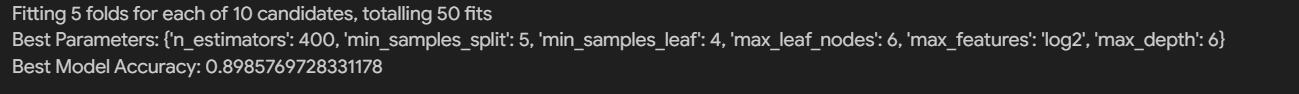

In [8]:
# print (f'Train Accuracy - : {grid_search.score(X_train,y_train):.3f}')
# print (f'Test Accuracy - : {grid_search.score(X_test,y_test):.3f}')

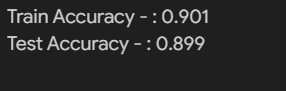

After Hyperparameter Tuning

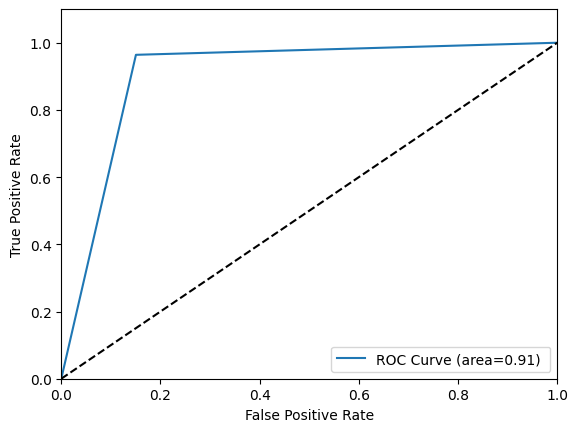

None
ROC_AUC_Score 0.906744724721508
Accuracy: 0.9071151358344114
Precision: 0.8664510166358595
F1 Score 0.9126308104161597
Recall Score: 0.9640102827763496


In [ ]:
Random_Forest_model = RandomForestClassifier(max_depth=6, max_features= 'log2', max_leaf_nodes=6, min_samples_leaf=4, min_samples_split= 5, n_estimators= 400)
Random_Forest_model.fit(X_train, y_train)
y_pred_best= Random_Forest_model.predict(X_test)   
print(AUC_RUC_BN(y_test,y_pred_best))
print('ROC_AUC_Score',roc_auc_score(y_test,y_pred_best))
print("Accuracy:",accuracy_score(y_test,y_pred_best))
print("Precision:",precision_score(y_test,y_pred_best))
print("F1 Score",f1_score(y_test,y_pred_best))
print("Recall Score:",recall_score(y_test,y_pred_best))

In [ ]:
print(y_test.tail())

6357     0
11697    1
16567    1
9131     0
18189    1
Name: Target, dtype: int64


In [ ]:
print(y_pred_best[-5:])

[0 1 1 0 1]


MODEL2

In [ ]:
data=pd.read_csv('Final_Project_dataset.csv')
data=data.drop(['UDI','Product ID'],axis=1)

Scaler=MinMaxScaler()
Encoder=LabelEncoder()

numerical_Columns=[ 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
for column in numerical_Columns:
    if  abs(data[column].skew()) > 0.5:
        data[column] = np.log(data[column])
    if column in numerical_Columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5* IQR
        upper_bound = Q3 +1.5 * IQR
        data[column]=data[column].clip(lower_bound,upper_bound)
data[numerical_Columns]=Scaler.fit_transform(data[numerical_Columns])  

data['Type']=data['Type'].map({'L':1.0,'M':2.0,'H':3.0})
data['Failure Type']=data['Failure Type'].map({'No Failure':1.0,'Power Failure':2.0,'Tool Wear Failure':3.0,'Overstrain Failure':4.0, 'Random Failures':5.0,'Heat Dissipation Failure':6.0})


X = data.drop(['Target', 'Failure Type'], axis=1)
y = data["Failure Type"]

SM=SMOTE()
X_resampled,y_resampled=SM.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

LR_Model=LogisticRegression()
LR_Model.fit(X_train,y_train)
y_pred_best= LR_Model.predict(X_test)   
print("Accuracy of Logistic Regression:",accuracy_score(y_test,y_pred_best))
print("******************")
Random_Forest_model = RandomForestClassifier()
Random_Forest_model.fit(X_train, y_train)
y_pred_best= Random_Forest_model.predict(X_test)   
print("Accuracy of Random Forest Classifier:",accuracy_score(y_test,y_pred_best))
print("******************")
Gradient_Boosting_model = GradientBoostingClassifier()
Gradient_Boosting_model.fit(X_train, y_train)
y_pred_best= Gradient_Boosting_model.predict(X_test)   
print("Accuracy of Gradient Boosting Classifier:",accuracy_score(y_test,y_pred_best))
print("******************")
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
y_pred_best= SVC_model.predict(X_test)   
print("Accuracy of Support Vector Classifier:",accuracy_score(y_test,y_pred_best))
print("******************")

d:\Python_Project\Final_Project\Zenml3\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.7726841060174393
******************
Accuracy of Random Forest Classifier: 0.991625658292325
******************
Accuracy of Gradient Boosting Classifier: 0.9917119917119918
******************
Accuracy of Support Vector Classifier: 0.9918846585513252
******************


In [ ]:
Random_Forest_model = RandomForestClassifier()
Random_Forest_model.fit(X_train, y_train)
y_pred_best= Random_Forest_model.predict(X_test)   
y_pred_proba=Random_Forest_model.predict_proba(X_test)
print(AUC_RUC_MC(y_test,y_pred_best))

print('roc_auc-Score',roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))
print('accuracy',accuracy_score(y_test, y_pred_best))
print('precision',precision_score(y_test,y_pred_best,average='weighted'))
print('F1_Score',f1_score(y_test,y_pred_best,average='weighted'))
print('recall_Score',recall_score(y_test,y_pred_best,average='weighted'))

In [ ]:
Random_Forest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [1]:
# param_grid = {
#     'n_estimators': [50,100, 200,400],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth' : [4,5,6,7,8],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_leaf_nodes': [3, 6, 9],
# }
# # Initialize RandomizedSearchCV
# grid_search = RandomizedSearchCV(estimator=Random_Forest_model, param_distributions=param_grid, cv=5,verbose=2,n_jobs=-1)
 
# # Fit the model to the training data using RandomizedSearchCV
# grid_search.fit(X_train, y_train)
 
# # Get the best parameters and best model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_
 
# # Make predictions on the test set using the best model
# y_pred_best = best_model.predict(X_test)
 
# # Evaluate the best model
# accuracy_best = accuracy_score(y_test, y_pred_best)
 
# # Print the results
# print("Best Parameters:", best_params)
# print(f"Best Model Accuracy: {accuracy_best}")

# print (f'Train Accuracy - : {grid_search.score(X_train,y_train):.3f}')
# print (f'Test Accuracy - : {grid_search.score(X_test,y_test):.3f}')

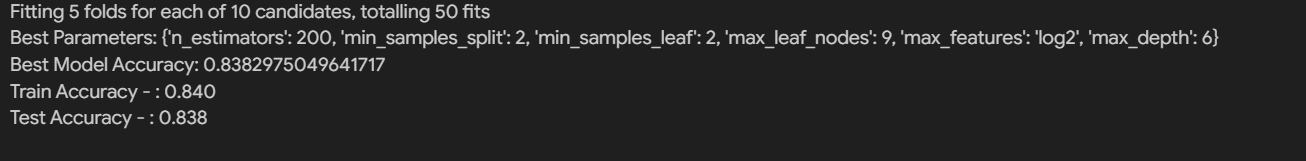

After Hyperparameter Tuning

Class: 1.0


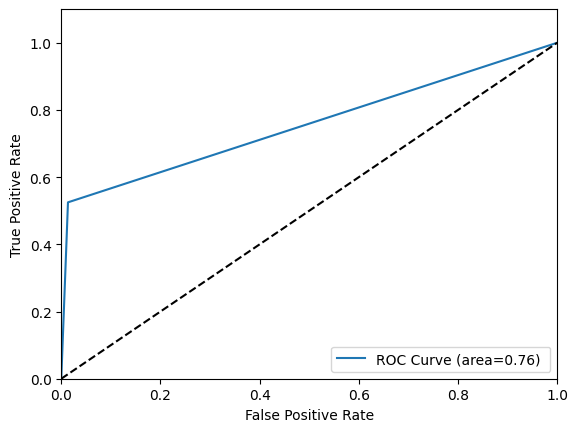

Class: 2.0


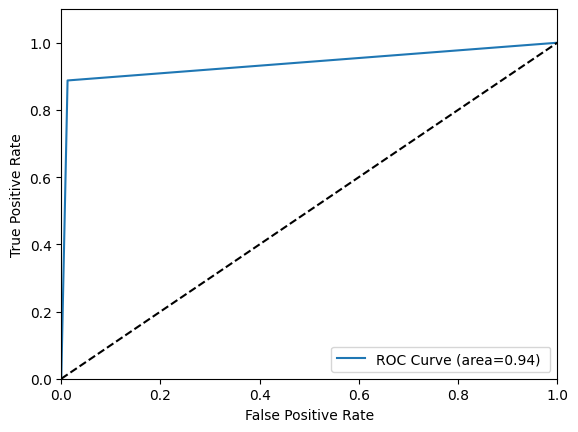

Class: 3.0


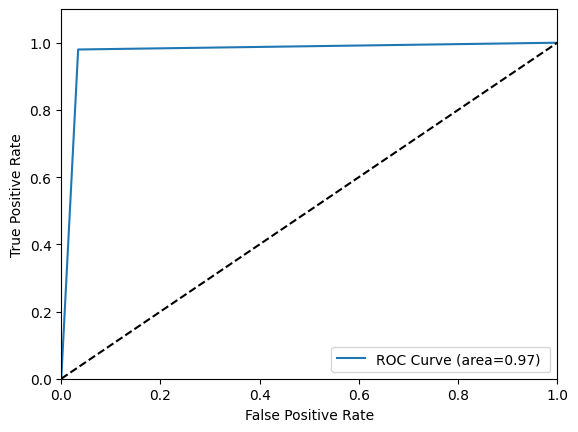

Class: 4.0


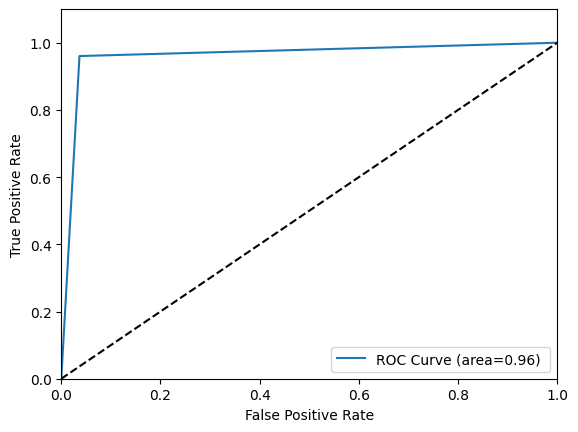

Class: 5.0


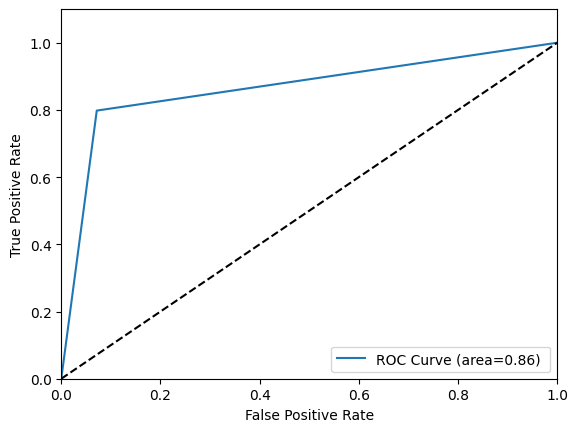

Class: 6.0


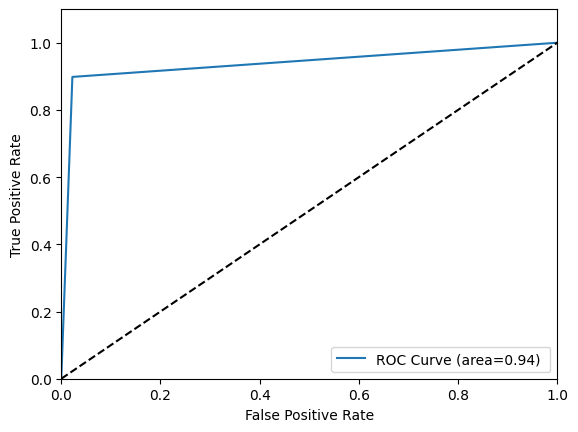

ROC_AUC_Score: {1.0: 0.7557312034359089, 2.0: 0.9375185470049237, 3.0: 0.9729275822912445, 4.0: 0.9618261925598975, 5.0: 0.8632323897300858, 6.0: 0.9379267106118717}
None
roc_auc-Score 0.969166065800379
accuracy 0.840973840973841
precision 0.848537799500579
F1_Score 0.8347068364486656
recall_Score 0.840973840973841


In [ ]:
Random_Forest_model = RandomForestClassifier(max_depth=8, max_features= 'log2', max_leaf_nodes=9, min_samples_leaf=4, min_samples_split= 5, n_estimators= 100)
Random_Forest_model.fit(X_train, y_train)
y_pred_best= Random_Forest_model.predict(X_test)   
y_pred_proba=Random_Forest_model.predict_proba(X_test)
print(AUC_RUC_MC(y_test,y_pred_best))

print('roc_auc-Score',roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))
print('accuracy',accuracy_score(y_test, y_pred_best))
print('precision',precision_score(y_test,y_pred_best,average='weighted'))
print('F1_Score',f1_score(y_test,y_pred_best,average='weighted'))
print('recall_Score',recall_score(y_test,y_pred_best,average='weighted'))

In [ ]:
print(X_test.head())

           Type  Air temperature [K]  Process temperature [K]  \
16971  1.000000             0.774666                 0.586352   
53134  1.000000             0.850344                 0.673893   
46497  1.880888             0.502319                 0.440922   
9584   1.000000             0.434783                 0.592593   
1566   2.000000             0.293478                 0.296296   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
16971                0.279078     0.994465         0.321092  
53134                0.249185     0.675553         0.137666  
46497                0.688906     0.313309         0.398563  
9584                 0.519029     0.523897         0.067194  
1566                 0.346625     0.588235         0.584980  


In [ ]:
print(y_test.tail())

32887    4.0
35872    4.0
4623     1.0
6231     1.0
40380    5.0
Name: Failure Type, dtype: float64


In [ ]:
print(y_pred_best[-5:])

[4. 4. 1. 5. 5.]
